In [4]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

2023-12-19 08:18:20.715644: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-19 08:18:20.861427: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-19 08:18:20.861478: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-19 08:18:20.863276: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-19 08:18:20.878356: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-19 08:18:20.880600: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [5]:
(X_train,Y_train),(X_test,Y_test)=keras.datasets.mnist.load_data()
X_train=X_train/255
X_test=X_test/255

11490434/11490434 [==============================] - 17s 1us/step


In [6]:
X_train[0].shape

(28, 28)

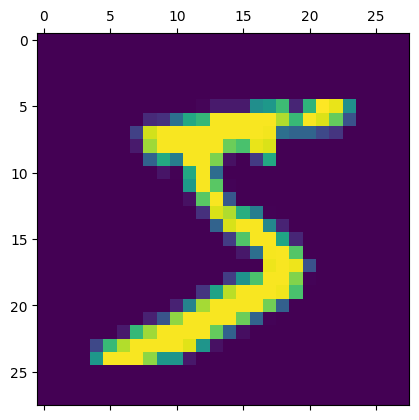

In [7]:
plt.matshow(X_train[0])

In [8]:
X_train_flat=X_train.reshape(len(X_train),28*28)
X_test_flat=X_test.reshape(len(X_test),28*28)

In [9]:
X_test_flat.shape

(10000, 784)

In [10]:
model=keras.Sequential([keras.layers.Dense(10,input_shape=(784,),activation="sigmoid")])

model.compile(optimizer="adam",
             loss="sparse_categorical_crossentropy",
             metrics=["accuracy"])
model.fit(X_train_flat,Y_train,epochs=5)

2023-12-19 08:19:09.384109: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4701 - accuracy: 0.8766
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3037 - accuracy: 0.9148
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2836 - accuracy: 0.9204
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2728 - accuracy: 0.9239
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2664 - accuracy: 0.9260


In [11]:
model.evaluate(X_test_flat,Y_test)

2023-12-19 08:20:33.473950: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 31360000 exceeds 10% of free system memory.


313/313 [==============================] - 2s 5ms/step - loss: 0.2681 - accuracy: 0.9250


[0.2681294083595276, 0.925000011920929]

In [12]:
Y_pred=model.predict(X_test_flat)
Y_pred[7]

2023-12-19 08:20:47.483684: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 31360000 exceeds 10% of free system memory.


313/313 [==============================] - 1s 3ms/step


array([1.3798847e-06, 1.3200559e-01, 7.9857688e-03, 3.9488126e-02,
       2.9503265e-01, 1.6892304e-01, 9.5111324e-04, 1.4872631e-02,
       9.7554691e-02, 9.7578329e-01], dtype=float32)

In [13]:
Y_p_l=[np.argmax(i)for i in Y_pred]
Y_p_l[:5]

[7, 2, 1, 0, 4]

In [14]:
Y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [15]:
fusion_confusion_matrix=tf.math.confusion_matrix(labels=Y_test,predictions=(Y_p_l))
conmatrix

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 960,    0,    2,    2,    0,    5,    7,    2,    2,    0],
       [   0, 1117,    3,    2,    0,    1,    4,    2,    6,    0],
       [   3,   11,  919,   19,    7,    5,   11,   10,   42,    5],
       [   2,    0,   15,  939,    0,   20,    2,   11,   14,    7],
       [   1,    1,    4,    2,  908,    0,   10,    4,    8,   44],
       [   7,    3,    4,   41,    9,  776,   10,    5,   30,    7],
       [  12,    3,    8,    1,    8,   14,  907,    2,    3,    0],
       [   1,    6,   21,    9,    7,    0,    0,  943,    3,   38],
       [   3,   11,    5,   36,    9,   28,    9,   10,  855,    8],
       [   8,    7,    2,   14,   22,    6,    0,   18,    6,  926]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'actual')

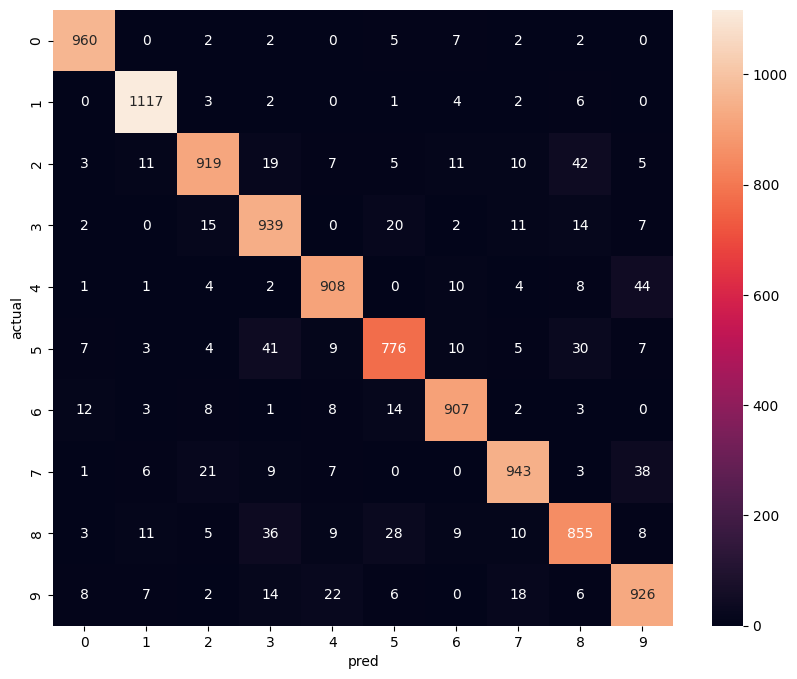

In [16]:
plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix,annot=True,fmt="d")
plt.xlabel("pred")
plt.ylabel("actual")

In [17]:
model=keras.Sequential([keras.layers.Dense(100,input_shape=(784,),activation="relu"),
                      keras.layers.Dense(10,activation="sigmoid")])

model.compile(optimizer="adam",
             loss="sparse_categorical_crossentropy",
             metrics=["accuracy"])
model.fit(X_train_flat,Y_train,epochs=5)

Epoch 1/5


2023-12-19 08:21:13.173824: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 [==============================] - 19s 9ms/step - loss: 0.2760 - accuracy: 0.9222
Epoch 2/5
1875/1875 [==============================] - 14s 8ms/step - loss: 0.1258 - accuracy: 0.9629
Epoch 3/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0881 - accuracy: 0.9736
Epoch 4/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0675 - accuracy: 0.9795
Epoch 5/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0518 - accuracy: 0.9838


In [18]:
model.evaluate(X_test_flat,Y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0733 - accuracy: 0.9766


[0.07333817332983017, 0.9765999913215637]